In [30]:
!pip install xgboost

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

In [46]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,num_years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


In [7]:
test_data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [8]:
test_data['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [9]:
train_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [10]:
train_data['num_years'] = train_data['Outlet_Establishment_Year'].apply(lambda x: 2013 - x) 
test_data['num_years'] = test_data['Outlet_Establishment_Year'].apply(lambda x: 2013 - x) 

In [11]:
train_data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


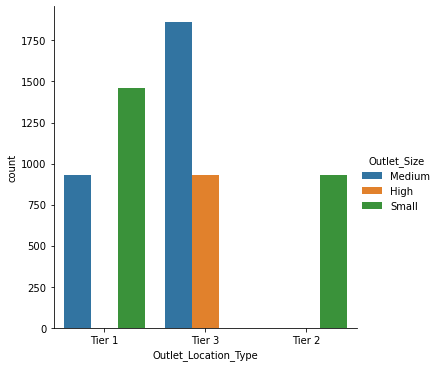

In [12]:
sns.factorplot('Outlet_Location_Type',data = train_data,hue ='Outlet_Size' ,kind='count')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


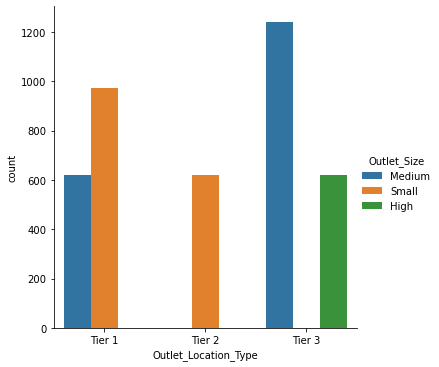

In [13]:
sns.factorplot('Outlet_Location_Type',data = test_data,hue ='Outlet_Size' ,kind='count')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


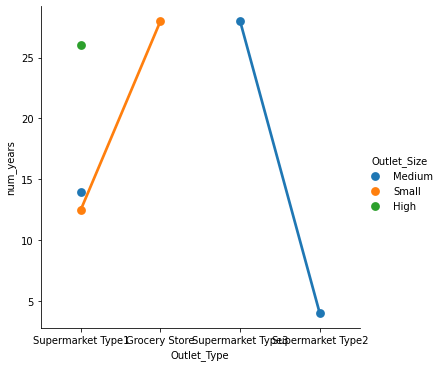

In [14]:
sns.factorplot('Outlet_Type','num_years',data = test_data,hue='Outlet_Size' )

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


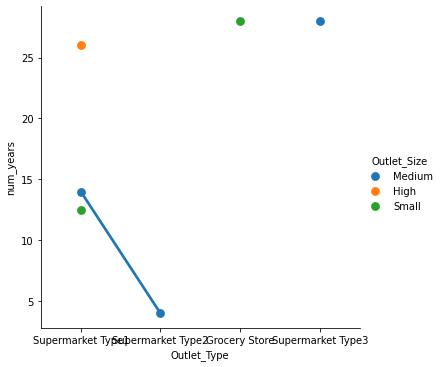

In [15]:
sns.factorplot('Outlet_Type','num_years',data = train_data,hue='Outlet_Size' )

In [16]:
full_data = [train_data, test_data]

In [17]:
for data in full_data:
    data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace = True)
    data['Outlet_Size'].fillna('Medium',inplace = True)  

In [18]:
col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [19]:
train_datar = pd.get_dummies(train_data, columns = col, drop_first = True)
test_datar = pd.get_dummies(test_data, columns = col,drop_first = True)

In [20]:
feat_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'num_years',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']

In [21]:
X = train_datar[feat_cols]
y = train_datar['Item_Outlet_Sales']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)

In [31]:
from xgboost.sklearn import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))

In [33]:
rmse

1199.8410346504536

In [34]:
X_t = test_datar[feat_cols]
y_result = XGB.predict(X_t)

In [35]:
y_result

array([1747.2274 , 1265.3572 ,  202.73059, ..., 1714.7622 , 5602.5938 ,
       1564.9109 ], dtype=float32)

In [36]:
result = pd.DataFrame()
result['Item_Identifier'] = test_datar['Item_Identifier']
result['Outlet_Identifier'] = test_datar['Outlet_Identifier']

result["Item_Outlet_Sales"] = y_result
result = result.sort_index()
result.to_csv('Bigmart_XGBoost3.csv',index = False)

# Impute missing values

<AxesSubplot:title={'center':'Item_Weight'}, xlabel='Outlet_Identifier'>

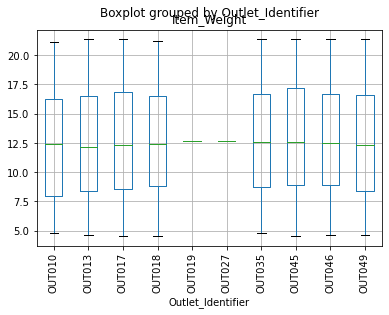

In [37]:
data.boxplot(column='Item_Weight', by='Outlet_Identifier', rot=90)

This graph shows that the missing weight affects two outlets.

In [38]:
item_av_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
item_av_weight.head()

,Item_Weight
Item_Identifier,
DRA12,11.965211
DRA24,19.350000
DRA59,8.270000
DRB01,8.451127
DRB13,7.760158


In [39]:
null_mask_weight = data['Item_Weight'].isnull()

In [40]:
data.loc[null_mask_weight, 'Item_Weight'] = data.loc[null_mask_weight, 'Item_Identifier'].apply(lambda x: item_av_weight.loc[x])

Text(0.5, 1.0, '')

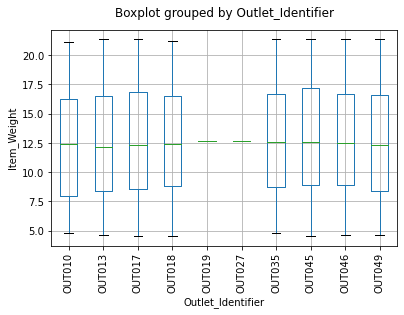

In [41]:
ax = data.boxplot(column='Item_Weight', by='Outlet_Identifier', rot=90)
ax.set_ylabel('Item_Weight')
ax.set_title('')

And now we can see that the values we have chosen to replace the missing weights are reasonable as the boxplot of the affected outlets now follows the same pattern as the others.

# Outlet Size

In [42]:
from scipy.stats import mode
data['Outlet_Size'] = data['Outlet_Size'].fillna('unknown')
outlet_type_mode_size = data.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x:mode(x).mode[0]))
outlet_type_mode_size

,Outlet_Size
Outlet_Type,
Grocery Store,Medium
Supermarket Type1,Medium
Supermarket Type2,Medium
Supermarket Type3,Medium


It could be reasonable to impute the missing values of Outlet_size by the mode size for each Outlet Type.Grocery stores could be considered to be smaller than the supermarkets, so we could replace the 'unknown' in the pivot table above by 'small', but let's check the the sales in each Outlet_Type to see if we can confirm this.

In [48]:
data['Item_Visibility'].value_counts().head()

0.000000    353
0.080293      2
0.041525      2
0.052059      2
0.026836      2
Name: Item_Visibility, dtype: int64

In [49]:
data['Item_Visibility'] = data['Item_Visibility'].replace({0:np.nan})

[Text(0, 0, 'Snack Foods'),
 Text(1, 0, 'Dairy'),
 Text(2, 0, 'Others'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Baking Goods'),
 Text(5, 0, 'Health and Hygiene'),
 Text(6, 0, 'Breads'),
 Text(7, 0, 'Hard Drinks'),
 Text(8, 0, 'Seafood'),
 Text(9, 0, 'Soft Drinks'),
 Text(10, 0, 'Household'),
 Text(11, 0, 'Frozen Foods'),
 Text(12, 0, 'Meat'),
 Text(13, 0, 'Canned'),
 Text(14, 0, 'Starchy Foods'),
 Text(15, 0, 'Breakfast')]

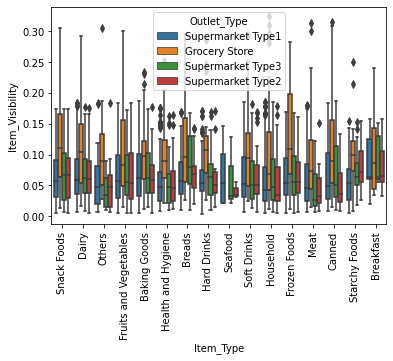

In [50]:
ax = sns.boxplot(data=data, x='Item_Type', y='Item_Visibility', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [51]:
data['Item_Visibility'].head(10)

0    0.007565
1    0.038428
2    0.099575
3    0.015388
4    0.118599
5    0.063817
6    0.082602
7    0.015782
8    0.123365
9    0.005698
Name: Item_Visibility, dtype: float64

In [52]:
table = data.pivot_table(values='Item_Visibility', index='Item_Type', columns='Outlet_Type', aggfunc='mean')
table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,0.098142,0.067716,0.066260,0.071503
Breads,0.117788,0.068426,0.071839,0.087680
Breakfast,0.106446,0.079872,0.082972,0.094691
Canned,0.120049,0.064088,0.050098,0.075482
Dairy,0.116482,0.069187,0.067043,0.071169
Frozen Foods,0.126552,0.065677,0.065937,0.066503
Fruits and Vegetables,0.107433,0.066618,0.067942,0.067521
Hard Drinks,0.113403,0.062428,0.060483,0.071265
Health and Hygiene,0.104711,0.056687,0.055821,0.055871


In [53]:
def find_mean(x):
    return table.loc[x['Item_Type'], x['Outlet_Type']]

# replace missing values in loan_amount with median values
data['Item_Visibility'].fillna(data[data['Item_Visibility'].isnull()].apply(find_mean, axis=1), inplace=True)

[Text(0, 0, 'Snack Foods'),
 Text(1, 0, 'Dairy'),
 Text(2, 0, 'Others'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Baking Goods'),
 Text(5, 0, 'Health and Hygiene'),
 Text(6, 0, 'Breads'),
 Text(7, 0, 'Hard Drinks'),
 Text(8, 0, 'Seafood'),
 Text(9, 0, 'Soft Drinks'),
 Text(10, 0, 'Household'),
 Text(11, 0, 'Frozen Foods'),
 Text(12, 0, 'Meat'),
 Text(13, 0, 'Canned'),
 Text(14, 0, 'Starchy Foods'),
 Text(15, 0, 'Breakfast')]

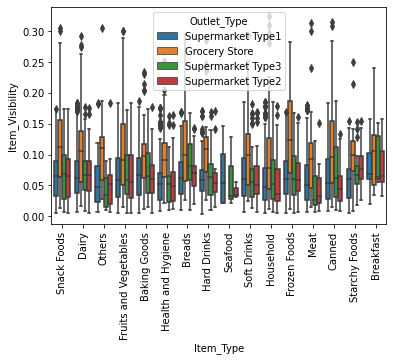

In [54]:
ax = sns.boxplot(data=data, x='Item_Type', y='Item_Visibility', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [55]:
data['Item_Visibility'].head(10)

0    0.007565
1    0.038428
2    0.099575
3    0.015388
4    0.118599
5    0.063817
6    0.082602
7    0.015782
8    0.123365
9    0.005698
Name: Item_Visibility, dtype: float64

# Combine Low Fat, low fat and LF to Low Fat and reg and Regular to Regular

In [56]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 
                                                             'low fat': 'Low Fat', 
                                                             'reg': 'Regular'})
data['Item_Fat_Content'].head(5)

0    Low Fat
1    Regular
2    Low Fat
3    Low Fat
4    Regular
Name: Item_Fat_Content, dtype: object

In [57]:
print('\nFrequency of Categories for variable Item_Fat_Content')
print(data['Item_Fat_Content'].value_counts())


Frequency of Categories for variable Item_Fat_Content
Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64


In [58]:
data['Outlet_Age'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Age'].head(5)

0    14
1     6
2    15
3     6
4    28
Name: Outlet_Age, dtype: int64

In [59]:
data['Outlet_Age'].describe()

count    5681.000000
mean       15.171097
std         8.372256
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Age, dtype: float64